Data set idea: weight loss

Variables:
- day - daily time series

- weight 
    - estimated by calories in / calories out based on 3500cal as 450g lost (https://www.mayoclinic.org/healthy-lifestyle/weight-loss/in-depth/calories/art-20048065) so every 1 calorie = 0.128205128g
    - Weight loss will be calculated each day. (calories out - calories in) * 0.0128205128 +/- random noise as weight loss is not exact


- calories in based on logging food with LoseIt 
    - split by carbs/protein/fat? put into separate variables by percent?
    - Not going to split by c/p/f in dataset but will just state calorie count assuming she maintains good ratios 
    
    
- calories out - based on BMR/TDEE and exercise
- target calorie amount - same number throughout
- over/under calorie target
- exercise 
    - boolean?  True/False whether I exercised or not
    - categorical? Listing different exercises (walk, run, yoga class, weight training)
    - estimated calories burned?
 - calories out - tdee + exercise 
     - function created to calculate tdee as it fluctuates each day
     - maybe +/- random amount to exercise so it's not so samey
    
Run weekly - 52 weeks per year over 2 years = 104 rows
or 
Daily - January-April 2019 inclusive = 119 rows
Can't figure out which would be better

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Time" data-toc-modified-id="Time-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Time</a></span><ul class="toc-item"><li><span><a href="#Code" data-toc-modified-id="Code-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Code</a></span></li></ul></li><li><span><a href="#Calories" data-toc-modified-id="Calories-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calories</a></span></li><li><span><a href="#Calories-In" data-toc-modified-id="Calories-In-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calories In</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Weight-Loss" data-toc-modified-id="Weight-Loss-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Weight Loss</a></span></li></ul></div>

This project simulates a dataset created by a woman - let's call her Zoe - who decided to track her weight loss efforts over the course of a calender year from 0/01/18 - 31/12/18. She set a daily average calorie allowance and committed to performing about 45 minutes of exercise approximately five days per week. She did a lot of research before beginning her journey to set herself up for success and was very fastidious in logging her calorie intake and estimated calorie output. 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)

## Time

The first thing Zoe had to decide was how often to track her progress. She found that there is a lot of conflicting information online about how often one should weigh themselves when trying to lose weight. Some believe that weighing in too frequently can cause anxiety (https://health.clevelandclinic.org/why-you-shouldnt-weigh-yourself-every-single-day/) or discouragement (https://www.medicinenet.com/to_weigh__or_not_to_weighthat_is_the_question/views.htm) as weight fluctuations in the short-term can be quite unpredictable due to factors such as hydration or what was last eaten. However, some studies have shown that higher weighing frequency is associated with greater weight loss, (https://link.springer.com/article/10.1207/s15324796abm3003_5) less weight regain, (https://link.springer.com/article/10.1186/1479-5868-5-54) and is not associated with adverse psychological outcomes like anxiety (https://onlinelibrary.wiley.com/doi/full/10.1002/oby.20946). It really comes down to personal preference and what an individual feels works well for them. (https://blog.myfitnesspal.com/how-often-should-you-weigh-yourself/)

Zoe is interested in collecting as much data as possible to track her weight loss efforts and so decides to weigh herself first thing in the morning every day (https://www.consumerreports.org/scales/the-best-time-to-weigh-yourself/) as she finds the consistent feedback helps her to stay on track and keep herself accountable. 

### Code




In [2]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.weekday.html

# Defining start and end dates.
start = '2018-01-01'
end = '2018-12-31'

# Creating the date rage.
date = pd.date_range(start, end, freq='D')

# Creating the dataframe and first column: date.
df = pd.DataFrame({'date': date})

# printing dataframe
df

,date
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
5,2018-01-06
6,2018-01-07
7,2018-01-08
8,2018-01-09
9,2018-01-10


A day column is added so Zoe can see what days of the week she is best able to stick to her plan, such as what days she is more likely to go too far above her calorie goal or what exercises she's more likely to perform on a particular day. She believes this will help her to be more conscious of her habits and tendencies. 

In [3]:
# Adding new column, days, which names the day of the week.
# https://stackoverflow.com/a/30222759
df['day'] = df['date'].dt.day_name()

# Change from object type to categorical type.
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
df['day'] = df['day'].astype('category')
df

,date,day
0,2018-01-01,Monday
1,2018-01-02,Tuesday
2,2018-01-03,Wednesday
3,2018-01-04,Thursday
4,2018-01-05,Friday
5,2018-01-06,Saturday
6,2018-01-07,Sunday
7,2018-01-08,Monday
8,2018-01-09,Tuesday
9,2018-01-10,Wednesday


## Calories 

Weight loss is very complex and depends on many factors such as: (https://www.niddk.nih.gov/health-information/weight-management/adult-overweight-obesity/factors-affecting-weight-health)

- Genetics
- Race
- Sex
- Age
- Diet
- Physical activity
- Environment
- Medical issues

Zoe is a 30 year old white Irish woman who lives in the suburbs and works at a sedentary office job. She has a moderately balanced diet (if perhaps a bit over indulgent!), exercises very little, and does not have any known medical issues that would affect her weight. Since there are no glaring physical or environmental factors that would hinder her weight loss, she believes that she can start to lose weight by making some slight lifestyle adjustments rather than any drastic changes. Fad diets or dietary supplements that promise quick weight-loss results are difficult to stick to long-term and can potentially be bad for one's health. (https://www.indi.ie/fact-sheets/healthy-eating,-healthy-weight-and-dieting/436-the-truth-about-fad-diets-and-dietary-supplements-for-weight-loss.html) Zoe decides to lower her calorie intake without changing the type food she eats too much and adds in a bit of exercise also.

The first thing she did was calculate how many calories she should consume per day in order to steadily lose weight. Two measurements were important here, her Basal Metabolic Rate (BMR) and Total Daily Energy Expenditure (TDEE). The BMR is the energy expenditure over a certain period of time by a person at rest (https://en.wikipedia.org/wiki/Basal_metabolic_rate). In other words, it is the number of calories burned by the body just by functioning normally without moving, such as breathing and circulating blood. It can be estimated based on a person's gender age, weight and height. The TDEE then is the number of calories a person should consume to maintain their current weight. There are many online calculators that help a person figure out their BMR - I have used a few different ones here see if different measurements are achieved:

Measurements used: Female, 30 years old, starting weight 80k,  height 175cm:

BMR
- 1578: https://tdeecalculator.net/  
- 1591: https://www.active.com/fitness/calculators/bmr 
- 1598: https://www.bodybuilding.com/fun/bmr_calculator.htm 
- 1578: https://www.calculator.net/bmr-calculator.html# 
- 1578: https://www.thecalculatorsite.com/health/bmr-calculator.php  (Mifflin St Jeor)
- 1600: https://www.thecalculatorsite.com/health/bmr-calculator.php (Harris Benedict)

TDEE: 
- https://tdeecalculator.net/ TDEE: 1894

https://www.thecalculatorsite.com/health/bmr-calculator.php - has good explanation of equations


Of course, not all calories are created equal. She could eat 1500 calories worth of junk food and still lose weight but this, of course would not be healthy. She aims each day to split her calorie allowance as follows: (https://www.healthline.com/nutrition/best-macronutrient-ratio#calorie-vs-calorie)

    - 45-65% carbohydrates
    - 20-35% fats
    - 10-35% proteins 
    
In this dataset the focus is on calories in and out but our subject is generally quite good at sticking to the above ratios. 

For exercise, look into how different exercises affect weight loss - a combination of cardio, strength training and flexibility training: https://www.verywellfit.com/types-of-exercise-for-weight-loss-3495992

With calories I might split by protein, ft and carbs - 

## Calories In

To track her calorie intake, Zoe used the LoseIt app (https://www.loseit.com/) which allows her to log everything she eats and provides her with a calorie total at the end of every day that she then logs into her dataset. 

It is not healthy to go below 1200 calories daily as it would be difficult to get the nutrition the body needs (https://www.everydayhealth.com/weight/can-more-calories-equal-more-weight-loss.aspx

Zoe aims to lose the weight slowly and in a sustainable manner and so follows the guidance of 0.5kg per week (https://www.mayoclinic.org/healthy-lifestyle/weight-loss/in-depth/weight-loss/art-20047752) This means 

The randint function allows me to set minimum and maximum calorie values and was my first thought when trying to come up with a suitable function. As can be seen below, it returns 365 integer values that could potentially be used as calorie measurements.

In [4]:
# Using randint for calorie in values
first_attempt = np.random.randint(1200, 2500, 365)
first_attempt

array([2110, 1548, 1691, 1251, 1998, 1512, 2378, 2317, 2324, 1504, 1873,
       2111, 1345, 2195, 2254, 2236, 1887, 2447, 2474, 1772, 1746, 2008,
       2136, 1458, 1814, 2292, 1514, 2152, 2175, 1995, 1855, 2326, 2034,
       1914, 2011, 1520, 2305, 1559, 1946, 2266, 1398, 2369, 1697, 1724,
       2050, 1788, 1933, 2174, 2471, 1220, 1733, 1411, 1462, 2280, 1664,
       1647, 2145, 1831, 2093, 1373, 1890, 1262, 2243, 1909, 1625, 1357,
       2094, 1460, 1861, 2496, 2455, 2142, 2288, 2328, 2395, 1513, 2093,
       2244, 1272, 2287, 1865, 1910, 1673, 2001, 1792, 2097, 1513, 1449,
       2362, 1966, 2452, 2194, 1697, 2107, 1720, 1843, 2478, 1428, 2137,
       2424, 1928, 1588, 2309, 1774, 1898, 1269, 1895, 1241, 2283, 1603,
       2164, 1762, 1298, 1888, 2454, 1374, 1258, 1699, 1530, 1435, 1597,
       1802, 1369, 2123, 1649, 1431, 1666, 2390, 2194, 1740, 2400, 2439,
       2315, 2121, 1548, 1320, 2368, 1806, 1756, 2272, 1498, 2051, 2238,
       1274, 2076, 2375, 1376, 1633, 1788, 1202, 17

However, the distribution for this function is uniform so Zoe is as likely to consume 2000 calories as she is to consume 1000 calories. Her daily calorie goal is the 1500 mark and so most values should ideally be centred around this figure. A normal distribution may work better. 

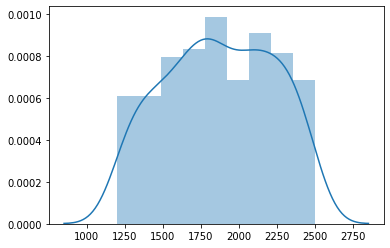

In [5]:
sns.distplot(first_attempt)
plt.show()

Again there is an issue as just using a regular normal distribution can return some values that are unrealistically below the minimum threshold of 1200 calories. Setting the mean to 1500 and 

In [6]:
second_attempt = np.random.normal(1500, 200, 365)
second_attempt

array([1515.38016605, 1876.39259763, 1594.38269853, 1743.41476727,
       1004.54532079, 1348.29224284, 1486.02609744, 1307.36333404,
       1433.30896551, 1433.65021297, 1062.74360295, 1433.66586559,
       1486.85025002, 1248.77447979, 1597.80617023, 1371.72757442,
       1730.34370088, 1839.18163224, 1291.82739439, 1427.32900944,
       1665.8308535 , 1869.29267884, 1412.70750732, 1307.3604874 ,
       1307.55574259, 1436.17013218, 1717.12239278, 1447.88966422,
       1746.38543267, 1688.21457332, 1476.29289909, 1574.93008104,
       1193.72253034, 1497.85046909, 1440.64180781, 1654.62276977,
       1654.26421701, 1266.29258152, 1449.65457615, 1635.84400497,
       1189.23288646, 1374.97864925, 1556.54648548, 1560.2899718 ,
       1494.62304012, 1756.93702326, 1753.70697631, 1463.51653805,
       1681.29682539, 1565.83986172, 1709.71143263, 1370.99421204,
       1223.50463648, 1196.58085638, 1326.79982832, 1629.18564162,
       1614.16090277, 1219.44775878, 1388.94153789, 1471.01929

The solution seemed to be using what is called a truncated normal distribution,(https://en.wikipedia.org/wiki/Truncated_normal_distribution) which allows upper and lower limits to be set and the data within is normally distributed. The function created below  uses *truncnorm* to generate 365 random numbers that are:

- not less than 1200. 
- not greater than 2500. 
- centre around an average value of 1500 with a standard deviation of 200.

The numbers are converted to integer values as no one would realistically track decimals of a calorie. The array below shows the output of the function and the numbers look to be an accurate representation of what is required. 

In [7]:
# https://stackoverflow.com/a/18444710 
# https://stackoverflow.com/a/53948014
# https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.truncnorm.html
# https://stackoverflow.com/a/37411711
    
def cal_in():
    low = 1200
    high = 2500
    mu = 1500
    sigma = 100
    x = stats.truncnorm((low - mu) / sigma, (high - mu) / sigma, loc=mu, scale=sigma)
    cal_val = x.rvs(365).astype(int)
    return cal_val

cal_in()

array([1593, 1411, 1470, 1651, 1457, 1565, 1499, 1303, 1490, 1585, 1386,
       1353, 1375, 1483, 1513, 1370, 1400, 1632, 1325, 1430, 1507, 1523,
       1495, 1526, 1677, 1401, 1626, 1248, 1539, 1580, 1548, 1526, 1421,
       1464, 1336, 1466, 1401, 1440, 1514, 1500, 1432, 1609, 1464, 1596,
       1525, 1644, 1609, 1581, 1410, 1601, 1372, 1472, 1479, 1612, 1596,
       1496, 1360, 1429, 1313, 1434, 1456, 1229, 1517, 1543, 1480, 1397,
       1609, 1411, 1336, 1419, 1394, 1364, 1571, 1462, 1551, 1521, 1552,
       1380, 1461, 1455, 1547, 1423, 1311, 1684, 1426, 1662, 1580, 1406,
       1290, 1407, 1571, 1291, 1376, 1398, 1598, 1599, 1602, 1497, 1518,
       1333, 1502, 1679, 1553, 1353, 1522, 1396, 1559, 1319, 1458, 1546,
       1560, 1523, 1578, 1468, 1460, 1584, 1542, 1455, 1535, 1389, 1522,
       1604, 1338, 1392, 1394, 1465, 1465, 1483, 1323, 1383, 1603, 1527,
       1604, 1526, 1410, 1496, 1744, 1337, 1706, 1611, 1600, 1602, 1521,
       1489, 1417, 1473, 1463, 1404, 1687, 1489, 15

The plot shows the distribution of these values. The vast majority are very close to the 1500 calorie mark as the standard deviation (sigma) was set quite low at only 100 calories. The reason for this is outlined below.

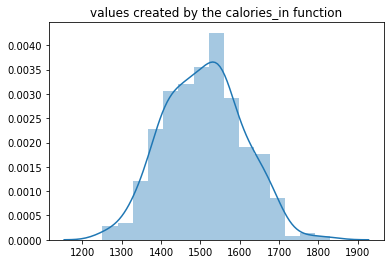

In [8]:
# Plotting the distribution of calories_in
sns.distplot(cal_in()) 
plt.title('values created by the calories_in function')
plt.show()

Like many people,  Zoe tends to consume more calories over the weekend than during the week. (https://www.webmd.com/diet/features/avoid-weekend-weight-gain#1) Being aware of this, she tries as best she can to stick closely to the 1500 calorie budget during the week. To reflect this, the sigma value in the *cal_in* function above was set to just 100 calories to keep values close to 1500. At the weekend she can potentially consume between 250-500 calories (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5928328/) over her target calorie amount. When creating the calories_in column below, the days Saturday and Sunday get a random integer between 250-500 added to the value that was generated by the *cal_in* function. 

In [9]:
# https://note.nkmk.me/en/python-numpy-where/
# https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/

# Creating extra calorie amounts to be added to weekends.
extra_cal = np.random.randint(250, 500)

# Creating calories_in column with weekend values adjusted.
df['calories_in'] = np.where((((df['day'])=='Saturday') | ((df['day'])=='Sunday')), cal_in() + extra_cal, cal_in())

df

,date,day,calories_in
0,2018-01-01,Monday,1542
1,2018-01-02,Tuesday,1512
2,2018-01-03,Wednesday,1493
3,2018-01-04,Thursday,1707
4,2018-01-05,Friday,1614
5,2018-01-06,Saturday,1945
6,2018-01-07,Sunday,1867
7,2018-01-08,Monday,1603
8,2018-01-09,Tuesday,1566
9,2018-01-10,Wednesday,1573


## Exercise


With random choice the options are (None, Walk, Jog, Yoga)

Use choice as you can set probability for each option.

Say I do some form of exercise about 5 days per week: None = 2 * 17 = 34 days of no exercise = ~28% (make it 29 for 100% probability altogether)

Walk 3 days per week: Walk = 3 * 104 = 51 walks = ~43%

Jog 1 day per week = 17 jogs = ~14%

Yoga class about 1 day per week = 17 yoga classes = ~14%

Exercise not the most important thing for weight loss: https://www.vox.com/2016/4/28/11518804/weight-loss-exercise-myth-burn-calories

Exercise and calories burned: https://www.sciencealert.com/how-to-calculate-calories-burned-met-value-exercise?perpetual=yes&limitstart=1

In [10]:
# List of exercise activities.
# https://stackoverflow.com/a/52923373
activities = ["none", "walk", "jog", "yoga"]

# Separating out days of the week.
sat = df['day'] == 'Saturday'
sun = df['day'] == 'Sunday'
mon = df['day'] == 'Monday'
tue = df['day'] == 'Tuesday'
wed = df['day'] == 'Wednesday'
thu = df['day'] == 'Thursday'
fri = df['day'] == 'Friday'

# Setting exercise probabilities for each day
psat = np.random.choice(activities, size = (365), p=[0, 0.5, 0.2, 0.3])
psun = np.random.choice(activities, size = (365), p=[0, 0.75, 0.25, 0])
pmon = np.random.choice(activities, size = (365), p=[0.4, 0.5, 0.1, 0])
ptue = np.random.choice(activities, size = (365), p=[0.15, 0.25, 0.1, 0.5])
pwed = np.random.choice(activities, size = (365), p=[0.3, 0.5, 0.2, 0])
pthu = np.random.choice(activities, size = (365), p=[0.3, 0.2, 0, 0.5])
pfri = np.random.choice(activities, size = (365), p=[0.2, 0.4, 0.4, 0])

# Creating exercise column
df['exercise'] = np.select([sat, sun, mon, tue, wed, thu, fri], [psat, psun, pmon, ptue, pwed, pthu, pfri], default=np.nan)

# Change from object type to categorical type.
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
df['exercise'] = df['exercise'].astype('category')

df

,date,day,calories_in,exercise
0,2018-01-01,Monday,1542,walk
1,2018-01-02,Tuesday,1512,walk
2,2018-01-03,Wednesday,1493,none
3,2018-01-04,Thursday,1707,walk
4,2018-01-05,Friday,1614,jog
5,2018-01-06,Saturday,1945,walk
6,2018-01-07,Sunday,1867,jog
7,2018-01-08,Monday,1603,jog
8,2018-01-09,Tuesday,1566,yoga
9,2018-01-10,Wednesday,1573,none


Below is a function that tracks the estimated calories burned by exercising. Zoe exercises most days per week and averages at about 45 minutes per session. She uses her fitbit (https://www.fitbit.com/ie/home) to approximate the number of calories burned during each exercise session and logs that into her spreadsheet.  

In [11]:
# https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function

def exercise_cals(row):
    if row['exercise'] == 'yoga':
        return int(np.random.normal(150, 50))
    if row['exercise'] == 'walk':
        return int(np.random.normal(250, 50))
    if row['exercise'] == 'jog':
        return int(np.random.normal(300))
    if row['exercise'] == 'none':
        return 0
    
df['exercise_cals'] = df.apply(lambda row: exercise_cals(row), axis = 1)
df

,date,day,calories_in,exercise,exercise_cals
0,2018-01-01,Monday,1542,walk,226
1,2018-01-02,Tuesday,1512,walk,321
2,2018-01-03,Wednesday,1493,none,0
3,2018-01-04,Thursday,1707,walk,266
4,2018-01-05,Friday,1614,jog,298
5,2018-01-06,Saturday,1945,walk,322
6,2018-01-07,Sunday,1867,jog,300
7,2018-01-08,Monday,1603,jog,298
8,2018-01-09,Tuesday,1566,yoga,126
9,2018-01-10,Wednesday,1573,none,0


Since BMR and TDEE are both going to change as weight fluctuates, I have created the function below to recalculate them each day as part of the calories burned. I have used the Mifflin-St Jeor calculation as it is widely used and deemed to be quite accurate

In [12]:
# TDEE function
# only weight will change in this calculation

def tdee(weight):
    bmr = 10 * weight + 6.25 * 175 - 5 * 30 -161
    result = bmr * 1.2
    return int(result)

starting_tdee = tdee(80)

#df.insert(5, 'tdee', tdee(80))

#dee = tdee(80)

#df['tdee'] = 
#df

# https://stackoverflow.com/a/36459273
# https://stackoverflow.com/a/16327135
df['tdee'] = np.nan
df.loc[0, 'tdee'] = starting_tdee
df

,date,day,calories_in,exercise,exercise_cals,tdee
0,2018-01-01,Monday,1542,walk,226,1899.0
1,2018-01-02,Tuesday,1512,walk,321,NaN
2,2018-01-03,Wednesday,1493,none,0,NaN
3,2018-01-04,Thursday,1707,walk,266,NaN
4,2018-01-05,Friday,1614,jog,298,NaN
5,2018-01-06,Saturday,1945,walk,322,NaN
6,2018-01-07,Sunday,1867,jog,300,NaN
7,2018-01-08,Monday,1603,jog,298,NaN
8,2018-01-09,Tuesday,1566,yoga,126,NaN
9,2018-01-10,Wednesday,1573,none,0,NaN


Total calorie output is the sum of tdee and exercise_cals to figure out the total estimated number of calories burned each day

In [13]:
# df['calories_out'] = df['exercise_cals'] + df['tdee']
df['calories_out'] = np.nan
df.loc[0, 'calories_out'] = df.loc[0, 'exercise_cals'] + df.loc[0, 'tdee']
df

,date,day,calories_in,exercise,exercise_cals,tdee,calories_out
0,2018-01-01,Monday,1542,walk,226,1899.0,2125.0
1,2018-01-02,Tuesday,1512,walk,321,NaN,NaN
2,2018-01-03,Wednesday,1493,none,0,NaN,NaN
3,2018-01-04,Thursday,1707,walk,266,NaN,NaN
4,2018-01-05,Friday,1614,jog,298,NaN,NaN
5,2018-01-06,Saturday,1945,walk,322,NaN,NaN
6,2018-01-07,Sunday,1867,jog,300,NaN,NaN
7,2018-01-08,Monday,1603,jog,298,NaN,NaN
8,2018-01-09,Tuesday,1566,yoga,126,NaN,NaN
9,2018-01-10,Wednesday,1573,none,0,NaN,NaN


Calorie difference

In [14]:
#df['cal_dif'] = df['calories_out'] - df['calories_in']
df['cal_dif'] = np.nan
df.loc[0, 'cal_dif'] = df.loc[0, 'calories_in'] - df.loc[0, 'calories_out']
df

,date,day,calories_in,exercise,exercise_cals,tdee,calories_out,cal_dif
0,2018-01-01,Monday,1542,walk,226,1899.0,2125.0,-583.0
1,2018-01-02,Tuesday,1512,walk,321,NaN,NaN,NaN
2,2018-01-03,Wednesday,1493,none,0,NaN,NaN,NaN
3,2018-01-04,Thursday,1707,walk,266,NaN,NaN,NaN
4,2018-01-05,Friday,1614,jog,298,NaN,NaN,NaN
5,2018-01-06,Saturday,1945,walk,322,NaN,NaN,NaN
6,2018-01-07,Sunday,1867,jog,300,NaN,NaN,NaN
7,2018-01-08,Monday,1603,jog,298,NaN,NaN,NaN
8,2018-01-09,Tuesday,1566,yoga,126,NaN,NaN,NaN
9,2018-01-10,Wednesday,1573,none,0,NaN,NaN,NaN


Study about outdated 3500cal = 1lb idea: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4035446/

In [15]:
def cal_to_kg(calories):
    kg = calories * 0.00012858
    return kg

#df['kg_lost'] = cal_to_kg(df['cal_dif'])
df['kg_lost'] = np.nan
df.loc[0, 'kg_lost'] = cal_to_kg(df.loc[0, 'cal_dif'])
df

,date,day,calories_in,exercise,exercise_cals,tdee,calories_out,cal_dif,kg_lost
0,2018-01-01,Monday,1542,walk,226,1899.0,2125.0,-583.0,-0.074962
1,2018-01-02,Tuesday,1512,walk,321,NaN,NaN,NaN,NaN
2,2018-01-03,Wednesday,1493,none,0,NaN,NaN,NaN,NaN
3,2018-01-04,Thursday,1707,walk,266,NaN,NaN,NaN,NaN
4,2018-01-05,Friday,1614,jog,298,NaN,NaN,NaN,NaN
5,2018-01-06,Saturday,1945,walk,322,NaN,NaN,NaN,NaN
6,2018-01-07,Sunday,1867,jog,300,NaN,NaN,NaN,NaN
7,2018-01-08,Monday,1603,jog,298,NaN,NaN,NaN,NaN
8,2018-01-09,Tuesday,1566,yoga,126,NaN,NaN,NaN,NaN
9,2018-01-10,Wednesday,1573,none,0,NaN,NaN,NaN,NaN


In [16]:
#['weight'] = np.nan
#df['weight'].iloc[[0]] = 80 - df['kg_lost']
#df

#weight = 80
#df['weight'] = weight - df['kg_lost']
#df

starting_weight = 80

df['weight'] = np.nan
df.loc[0, 'weight'] = starting_weight + df.loc[0, 'kg_lost']
df

,date,day,calories_in,exercise,exercise_cals,tdee,calories_out,cal_dif,kg_lost,weight
0,2018-01-01,Monday,1542,walk,226,1899.0,2125.0,-583.0,-0.074962,79.925038
1,2018-01-02,Tuesday,1512,walk,321,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,Wednesday,1493,none,0,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,Thursday,1707,walk,266,NaN,NaN,NaN,NaN,NaN
4,2018-01-05,Friday,1614,jog,298,NaN,NaN,NaN,NaN,NaN
5,2018-01-06,Saturday,1945,walk,322,NaN,NaN,NaN,NaN,NaN
6,2018-01-07,Sunday,1867,jog,300,NaN,NaN,NaN,NaN,NaN
7,2018-01-08,Monday,1603,jog,298,NaN,NaN,NaN,NaN,NaN
8,2018-01-09,Tuesday,1566,yoga,126,NaN,NaN,NaN,NaN,NaN
9,2018-01-10,Wednesday,1573,none,0,NaN,NaN,NaN,NaN,NaN


## Weight Loss

Could I do some kind of probability distribution that makes total weight go up/down?

Or have one column with weight lost daily/weekly and then add/subtrct that to total weight in another column?

Weight lost every week: Say I lose an average of 0.5kg per week with a standard deviation of 0.25 and over a normal distribution.

Or with daily say it's 0.1kg per day average with a sd of 0.05g

No! I should base the weight loss on the other variables - exercise and calories - with a random amount added or subtracted as weight loss is not exact (is this noise?)


To account for daily fluctuations, weight loss or gain will not only depend on calories in/out but will also include a random variant. 


In [17]:
# TDEE function
# only weight will change in this calculation

#weight = df['weight'].iloc[[0]]

#def tdee(weight):
 #   bmr = 10 * weight + 6.25 * 175 - 5 * 30 -161
  #  result = bmr * 1.2
   # return result

#df['tdee'] = tdee(weight)
#df

In [18]:
# https://stackoverflow.com/a/34856727 
for i in range(1, len(df)):
    df.loc[i, 'tdee'] = tdee(df.loc[i-1, 'weight'])
    
    df.loc[i, 'calories_out'] = df.loc[i, 'exercise_cals'] + df.loc[i, 'tdee']
    
    df.loc[i, 'cal_dif'] = df.loc[i, 'calories_in'] - df.loc[i, 'calories_out'] 
    
    df.loc[i, 'kg_lost'] = cal_to_kg(df.loc[i, 'cal_dif'])
    
    df.loc[i, 'weight'] = df.loc[i-1, 'weight'] + df.loc[i, 'kg_lost']

In [19]:
df

,date,day,calories_in,exercise,exercise_cals,tdee,calories_out,cal_dif,kg_lost,weight
0,2018-01-01,Monday,1542,walk,226,1899.0,2125.0,-583.0,-0.074962,79.925038
1,2018-01-02,Tuesday,1512,walk,321,1898.0,2219.0,-707.0,-0.090906,79.834132
2,2018-01-03,Wednesday,1493,none,0,1897.0,1897.0,-404.0,-0.051946,79.782185
3,2018-01-04,Thursday,1707,walk,266,1896.0,2162.0,-455.0,-0.058504,79.723682
4,2018-01-05,Friday,1614,jog,298,1895.0,2193.0,-579.0,-0.074448,79.649234
5,2018-01-06,Saturday,1945,walk,322,1895.0,2217.0,-272.0,-0.034974,79.614260
6,2018-01-07,Sunday,1867,jog,300,1894.0,2194.0,-327.0,-0.042046,79.572214
7,2018-01-08,Monday,1603,jog,298,1894.0,2192.0,-589.0,-0.075734,79.496481
8,2018-01-09,Tuesday,1566,yoga,126,1893.0,2019.0,-453.0,-0.058247,79.438234
9,2018-01-10,Wednesday,1573,none,0,1892.0,1892.0,-319.0,-0.041017,79.397217


In [20]:
# Converting to integers and rounding weight

df['tdee'] = df.tdee.astype(int)

df['calories_out'] = df.calories_out.astype(int)

df['cal_dif'] = df.cal_dif.astype(int)

df['weight']= df.weight.round(3)

In [21]:
df.dtypes

date             datetime64[ns]
day                    category
calories_in               int32
exercise               category
exercise_cals             int64
tdee                      int32
calories_out              int32
cal_dif                   int32
kg_lost                 float64
weight                  float64
dtype: object

In [22]:
df

,date,day,calories_in,exercise,exercise_cals,tdee,calories_out,cal_dif,kg_lost,weight
0,2018-01-01,Monday,1542,walk,226,1899,2125,-583,-0.074962,79.925
1,2018-01-02,Tuesday,1512,walk,321,1898,2219,-707,-0.090906,79.834
2,2018-01-03,Wednesday,1493,none,0,1897,1897,-404,-0.051946,79.782
3,2018-01-04,Thursday,1707,walk,266,1896,2162,-455,-0.058504,79.724
4,2018-01-05,Friday,1614,jog,298,1895,2193,-579,-0.074448,79.649
5,2018-01-06,Saturday,1945,walk,322,1895,2217,-272,-0.034974,79.614
6,2018-01-07,Sunday,1867,jog,300,1894,2194,-327,-0.042046,79.572
7,2018-01-08,Monday,1603,jog,298,1894,2192,-589,-0.075734,79.496
8,2018-01-09,Tuesday,1566,yoga,126,1893,2019,-453,-0.058247,79.438
9,2018-01-10,Wednesday,1573,none,0,1892,1892,-319,-0.041017,79.397
